# A Tale of Four Cities: Analysis of Weather Trends in Past Two Decades

Researcher: Fan Yang <br>
Email: [fan.yang@stern.nyu.edu](fan.yang@stern.nyu.edu)

![Map](files/Map.png)

## Introduction

Our environment is evolving with time and human activity, and society is becoming more aware of it. But what does that really mean for us? Climate change is a widely discussed topic, but the relevant research is usually not easily accessible and relatable to the layperson. This project aims to examine how the weather patterns have evolved in the last two decades by analyzing key weather variables, and visualizing these changes in a way that makes its relevance for these cities clear.   

**Data Source:**

The data for this project comes from the [National Oceanic and Atmospheric Administration Data Tool](https://www.ncdc.noaa.gov/cdo-web/datatools/selectlocation), which allows data requests specifying location, time range and variables, and provides the requested data as a csv. This was the most efficient method of gathering data, and I have uploaded the relevant .csv data files to Github. Note that data for this project are all in metric units, for ease of interpretation and consistency with research standards. 

**Scope of Project:**

I have selected four cities for analysis, because widely varying levels of data availability across locations does not allow for world-wide analysis and presentation in a map format. The criteria for selecting cities are data availability, size and diversity (in geographic location, climate type, as well as interest to audience). This allows for a more interesting sample of cities, as well as the opportunity to observe trend disparities across different climate and geography types, and potential for a broader analysis project in the future. 

Based on this criteria, I've selected the following four cities for analysis:

* New York City, NY, US (Humid Subtropical climate; urban heat island)
* Shanghai, China (Subtropical Maritime Monsoon climate)
* Anchorage, AK, US (Subarctic climate)
* Lhasa, Tibet, China (combination of/proximity to humid continental, cool semi-arid, subtropical highland climates)

**Project Outline:**
1. Data Gathering
2. Temperature Analysis
    * Preliminary Analysis of Temperature Trends
    * Analysis on Different Measures of Temperature Change
3. Precipitation Analysis
4. Conclusion




## Data Gathering

The NOAA database includes a wide range variables and in most cases only a subset is available for each city. I download all potentially relevant data for each city, combine and clean them, then select the relevant variables for analysis below. 

The data used for this project spans two decades (1998-01 to 2018-01), and all variables are reported at monthly frequency. The main weather variables for analysis are temperature and precipitation. Specifically:

- average monthly temperature is used as a general indicator of the local climate
- average daily emperature difference is used as an indicator of temperature volatility. This is calculated as the difference between average daily max temperature and average daily min temperature for the month. 
- total monthly precipitation is used as a complementary dimension to the temperature analysis




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt         
import numpy as np

% matplotlib inline

from pandas_datareader import data
import datetime as dt

Below I import the data I've downloaded, which are in three separate csv files: 

In [2]:
data1 = pd.read_csv("https://raw.githubusercontent.com/fyang487/Data_Bootcamp_Final_Project/master/Data/Data_1.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/fyang487/Data_Bootcamp_Final_Project/master/Data/Data_2.csv")
data3 = pd.read_csv("https://raw.githubusercontent.com/fyang487/Data_Bootcamp_Final_Project/master/Data/Data_3.csv")

In [3]:
data1.shape

(241, 24)

In [4]:
data2.shape

(960, 18)

In [5]:
data3.shape

(447, 23)

In [6]:
# Combine the datasets by appending before proceeding to organizing the data:
data = data1.append([data2, data3])
list(data.columns.sort_values())

['AWND',
 'CDSD',
 'DATE',
 'DP10',
 'DSND',
 'DSNW',
 'DT32',
 'DX90',
 'ELEVATION',
 'EMNT',
 'EMSD',
 'EMSN',
 'EMXP',
 'EMXT',
 'HDSD',
 'LATITUDE',
 'LONGITUDE',
 'NAME',
 'PRCP',
 'SNOW',
 'STATION',
 'TAVG',
 'TMAX',
 'TMIN',
 'WSF5',
 'WSFG']

In [7]:
# Rename the columns to more readable names:
data = data.rename(columns = {
    'AWND':'Avg Wind Speed',
    'DSND':'Snowdepth>1_inch',
    'DSNW':'Snowfall>1_inch',
    'DT32':'Min_temp<32',
    'DX90':'Max_temp>90',
    'EMNT':'Extreme_min_temp',
    'EMSD':'Max_daily_snowdepth', 
    'EMSN':'Max_daily_snowfall',
    'EMXP':'Max_daily_precip',
    'EMXT':'Extreme_max_temp',
    'PRCP':'Total_monthly_precip',
    'SNOW':'Total_monthly_snowfall',
    'TAVG':'T_midpoint',
    'TMAX':'Avg_daily_max_temp', 
    'TMIN':'Avg_daily_min_temp', 
    'WSF5':'Max_windspeed',
    'NAME':'Name', 
    'DATE':'Date'
    
})

In [8]:
# Rename the "Name" column to the city names: 
data.Name.unique()

array(['NY CITY CENTRAL PARK, NY US', 'CAPE TOWN INTERNATIONAL, SF',
       'LANZHOU, CH', 'PARIS LE BOURGET, FR', 'LHASA, CH', 'SHANGHAI, CH',
       'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, AK US',
       'SINGAPORE CHANGI INTERNATIONAL, SN'], dtype=object)

In [9]:
data.Name.replace(["NY CITY CENTRAL PARK, NY US", 'CAPE TOWN INTERNATIONAL, SF', 'LANZHOU, CH',
                   'PARIS LE BOURGET, FR', 'LHASA, CH', 'SHANGHAI, CH', 
                   'ANCHORAGE TED STEVENS INTERNATIONAL AIRPORT, AK US','SINGAPORE CHANGI INTERNATIONAL, SN'] , 
                       
                  ["New_York", "Cape_Town", "Lanzhou", "Paris", "Lhasa", "Shanghai",
                        "Anchorage", "Singapore"], inplace = True)

The initial data collection process included a set of potential cities; below I separate data on the four cities for further analysis. After further organizing, I will create separate dataframes for each variable type (temperature and precipitation).

In [10]:
dataset1 = data.set_index("Name").loc[["New_York", "Lhasa", "Anchorage", "Shanghai"]].reset_index()

## Temperature analysis

In [11]:
# Creating new variables that will be used in analysis later on: 

dataset1["Temp_diff"] = dataset1["Avg_daily_max_temp"]-dataset1["Avg_daily_min_temp"]
dataset1["Extrm_T_diff"] = dataset1["Extreme_max_temp"]-dataset1["Extreme_min_temp"]

In [12]:
dataset1.Date = pd.to_datetime(dataset1["Date"])

In [13]:
# Creating a dataframe specific to temperature data, for easier access 

temp_data = dataset1[["Name","Date", 'T_midpoint','Avg_daily_max_temp', 
                  'Avg_daily_min_temp', "Temp_diff",'Extreme_max_temp', 'Extreme_min_temp', "Extrm_T_diff"]]
temp_data = temp_data.groupby(temp_data["Name"])

In [14]:
temp_data.head(3)

,Name,Date,T_midpoint,Avg_daily_max_temp,Avg_daily_min_temp,Temp_diff,Extreme_max_temp,Extreme_min_temp,Extrm_T_diff
0,New_York,1998-01-01,4.4,7.7,1.2,6.5,18.3,-10.0,28.3
1,New_York,1998-02-01,4.8,7.9,1.7,6.2,14.4,-8.3,22.7
2,New_York,1998-03-01,7.4,11.2,3.7,7.5,30.0,-7.2,37.2
241,Lhasa,1998-01-01,0.5,8.6,-7.7,16.3,14.1,-11.5,25.6
242,Lhasa,1998-02-01,3.0,10.0,-4.1,14.1,15.5,-9.9,25.4
243,Lhasa,1998-03-01,4.8,11.5,-1.9,13.4,16.9,-7.5,24.4
458,Anchorage,1998-01-01,-9.2,-5.9,-12.5,6.6,0.6,-23.9,24.5
459,Anchorage,1998-02-01,-3.5,-0.1,-6.8,6.7,5.0,-16.1,21.1
460,Anchorage,1998-03-01,-1.0,3.2,-5.3,8.5,9.4,-16.7,26.1
699,Shanghai,1998-01-01,5.0,8.0,2.1,5.9,16.7,-4.4,21.1


In [15]:
# Creating a function to calculate percent changes on variables, used in analysis later on. 

def pct_chg (df):
    df["YoY_Avg_temp_pct_chg"] = df["T_midpoint"].pct_change(12)
    
    df["rolling_Temp_diff_pct_chg"] = df["Temp_diff"].pct_change(1)
    df["YoY_Temp_diff_pct_chg"] = df["Temp_diff"].pct_change(12)
    
    df["rolling_Extrm_T_diff_pct_chg"] = df["Extrm_T_diff"].pct_change(1)
    df["YoY_Extrm_T_diff_pct_chg"] = df["Extrm_T_diff"].pct_change(12)

    return df

temp_data = temp_data.apply(pct_chg)
temp_data = temp_data.groupby(temp_data["Name"])

## 1. Preliminary Analysis of Temperature Trends
  

Text(0.5,0.98,'Monthly Average Temperatures')

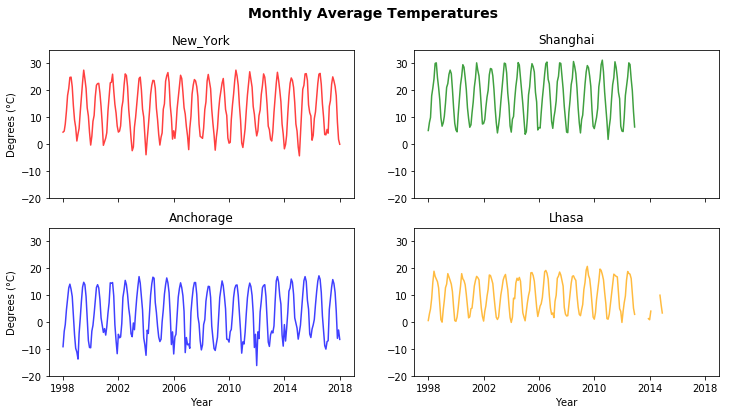

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax: 
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").T_midpoint, color = colors[count], alpha = 0.75)
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_ylim (-20, 35)
    
    # Set labels on the left and bottom axes of the entire graph only
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Degrees (°C)")
    if count > 1: 
        xxx.set_xlabel ("Year")
    
    count += 1

fig.suptitle("Monthly Average Temperatures", fontsize = 14, fontweight = "bold") 

This preliminary set of graphs show clear annual cycles and variation by location; they all share the same axes so graphs are directly comparable. Anchorage and Lhasa are much colder overall than New York and Shanghai; Lhasa has the smallest annual temperature variability. This shows an interesting comparison across locations, but there's no obvious time trend outside of the seasonal cycle. 

Text(0.5,0.98,'Average Daily Temperature Difference Each Month')

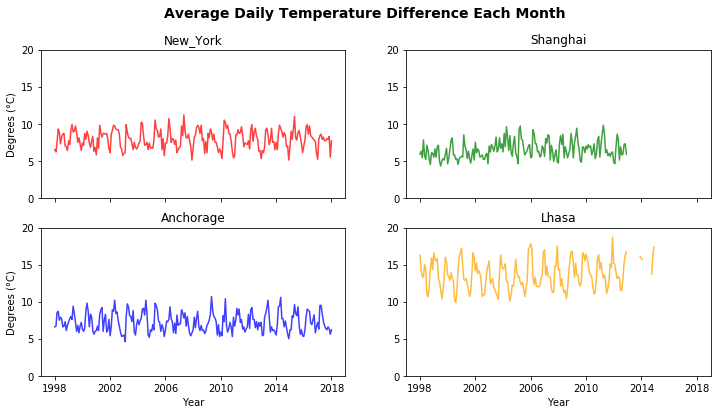

In [17]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax: 
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").Temp_diff, color = colors[count], alpha = 0.75)
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_ylim (0, 20)
    
    # Set labels on the left and bottom axes of the entire graph only
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Degrees (°C)")
    if count > 1: 
        xxx.set_xlabel ("Year")
    count += 1

fig.suptitle("Average Daily Temperature Difference Each Month", fontsize = 14, fontweight = "bold") 

There's clearly more volatility in the temperature differences (as compared to monthly temperature). Lhasa stands out once again, with a higher average intra-day temperature difference, while the previous set of graphs showed that it has the lowest annual variation. 

These temperature differences still seem to contain a seasonal cyclicality (though not prominent in Shanghai), and don't show any clear time trends. 

## 2. Analysis on Different Measures of Temperature Change

In order to examine possible time trends more directly, I calculate the percent changes, both on a rolling basis (change from the previous month) and a year-on-year basis (change from the same month in the previous year). The year-on-year calculations should be able to remove the seasonal cyclicality and isolate the change over the years. 

### Rolling change:

Text(0.5,0.98,'Rolling Percent Change in Temperature Difference')

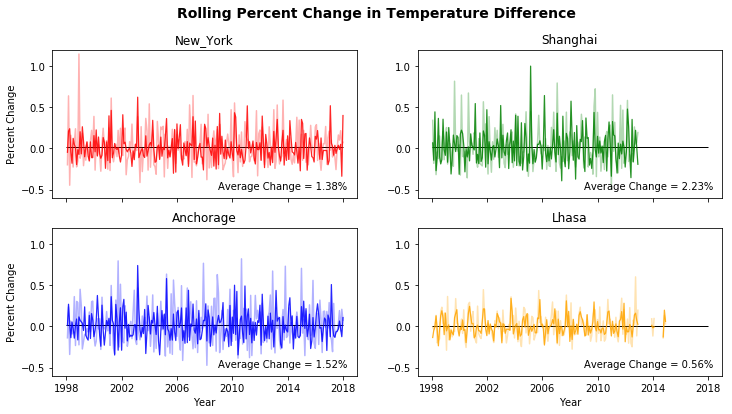

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax: 
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").rolling_Temp_diff_pct_chg, 
             color = colors[count], alpha = 0.85, linewidth = 1.25)
    
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").rolling_Extrm_T_diff_pct_chg, 
             color = colors[count], alpha = 0.3)
    
    # Plot average change as horizontal line
    mean = temp_data.get_group(city_names[count]).rolling_Temp_diff_pct_chg.mean()
    xxx.hlines(mean, pd.to_datetime("1998-01"), pd.to_datetime("2018-01"), linewidth = 1)

    # Add text on each subplot stating the average change
    message = "Average Change = " + str(round(mean*100,2)) + "%" 
    xxx.text("2009", -0.5, message, horizontalalignment='left')
    
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_ylim (-0.6, 1.2)
    
    # Set labels on the left and bottom axes of the entire graph only
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Percent Change")
    if count > 1: 
        xxx.set_xlabel ("Year")
    count += 1

fig.suptitle("Rolling Percent Change in Temperature Difference", fontsize = 14, fontweight = "bold") 

For each city, I plot the percent change in average daily temperature difference (bright-colored line) and the average change for the time period (horizontal line). Though there doesn't seem to be a consistent upward trend over time in temperature volatility, the average percent change is positive for all four cities, indicating that **temperature volatility (as indicated by average daily temperature differences) is increasing. **

I've also plotted percent change in monthly extreme temperature difference (lighter-colored line)for comparison; it seems like the difference in monthly temperature extremes experience much higher volatility, but holds the same trend as average intra-day temperature difference overall. 

### Year-on-year change:

Text(0.5,0.98,'Year-over-Year Percent Change in Temperature Difference')

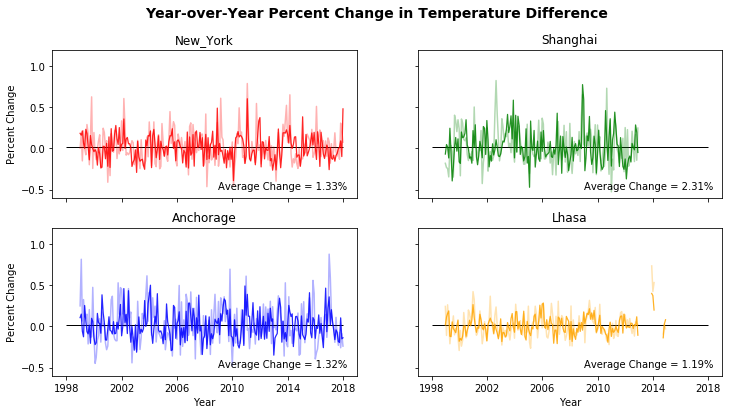

In [19]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True,  figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax: 
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").YoY_Temp_diff_pct_chg, 
             color = colors[count], alpha = 0.85, linewidth = 1.25)
    
    xxx.plot(temp_data.get_group(city_names[count]).set_index("Date").YoY_Extrm_T_diff_pct_chg, 
             color = colors[count], alpha = 0.3)
   
    # Plot average change as horizontal line
    mean = temp_data.get_group(city_names[count]).YoY_Temp_diff_pct_chg.mean()
    xxx.hlines(mean, pd.to_datetime("1998-01"), pd.to_datetime("2018-01"), linewidth = 1)
    
    # Add text on each subplot stating the average change
    message = "Average Change = " + str(round(mean*100,2)) + "%" 
    xxx.text("2009", -0.5, message, horizontalalignment='left')
    
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_ylim (-0.6, 1.2)
    xxx.set_title (city_names[count], fontsize = 12)
    
    # Set labels on the left and bottom axes of the entire graph only
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Percent Change")
    if count > 1: 
        xxx.set_xlabel ("Year")
    count += 1

fig.suptitle("Year-over-Year Percent Change in Temperature Difference", fontsize = 14, fontweight = "bold") 

I plot the year-on-year percent changes in temperature differences using the same methodology as that for the rolling-basis change analysis. The two sets of graphs share the same vertical axis and therefore are directly comparable. Evidently, removing the seasonal cyclicality by using year-on-year changes results in more volatile patterns in temperature differences. This might be a more meaningful and indicative measure of change in temperature volatility. The average percent changes are on the same order of magnitude as the rolling-basis analysis, and **confirm the previous observation that temperature volatility is increasing. **

There also seems to be a small upward trend in these percent differences; this could be an area for more rigorous analysis using regressions in the future. 

### Temperature difference analysis on a larger timescale:

Thus far, the analysis has focused on different measures of temperature volatility for each month, and removing the seasonal cyclicality. That leads to the question of whether there are any meaningful patterns in the temperature difference on the annual scale--i.e., difference between max and min temperatures for each entire year. This would account for any change in volatility of the seasonal cycle itself. 

Text(0.5,0.98,'Yearly Temperature Difference')

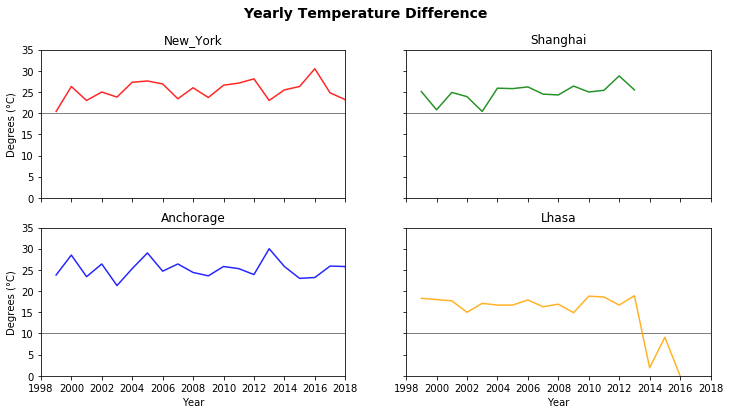

In [20]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True,  figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax:
    
    # Group data by year, perform calculations on the aggregate, then plot the result
    test = temp_data.get_group(city_names[count]).groupby([pd.Grouper(key="Date", freq="Y")])
    diff = test.T_midpoint.max() - test.T_midpoint.min()

    xxx.plot(diff, color = colors[count], alpha = 0.85, linewidth = 1.5)
    
    # Labels
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_xlim ("1998", "2018")
    xxx.set_ylim (0, 35)
        
    # Plot a horizontal line close to the line graph in each subplot for reference
    if count > 1: 
        xxx.hlines(10, pd.to_datetime("1998-01"), pd.to_datetime("2018-01"), linewidth = 0.5)
        xxx.set_xlabel ("Year")    
    else: 
        xxx.hlines(20, pd.to_datetime("1998-01"), pd.to_datetime("2018-01"), linewidth = 0.5)
    
    # Set labels on the left and bottom axes of the entire graph only
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Degrees (°C)")
    if count > 1: 
        xxx.set_xlabel ("Year")
        
    count += 1

fig.suptitle("Yearly Temperature Difference", fontsize = 14, fontweight = "bold") 

This set of graphs show a clear upward drift in temperature difference for New York and Shanghai, while the trend is virtually flat in Anchorage and Lhasa. The horizontal lines are for comparison and to contrast with the trend in the graphs. The disparity among the cities raise intresting questions about what causes the difference; perhaps warmer and colder climates are impacted differently. 

## Precipitation analysis

In [21]:
# Creating separate dataframe for precipitation data

precip_data = dataset1 [['Name','Date','Max_daily_precip','Total_monthly_precip','Max_daily_snowfall',
                        'Total_monthly_snowfall']]
precip_data = precip_data.groupby("Name")

In [22]:
precip_data.head(2)

,Name,Date,Max_daily_precip,Total_monthly_precip,Max_daily_snowfall,Total_monthly_snowfall
0,New_York,1998-01-01,64.8,132.1,13.0,13.0
1,New_York,1998-02-01,32.3,147.6,0.0,0.0
241,Lhasa,1998-01-01,0.0,0.0,NaN,NaN
242,Lhasa,1998-02-01,0.1,0.1,NaN,NaN
458,Anchorage,1998-01-01,5.6,11.5,64.0,173.0
459,Anchorage,1998-02-01,5.1,6.1,64.0,69.0
699,Shanghai,1998-01-01,32.1,196.1,NaN,NaN
700,Shanghai,1998-02-01,37.1,61.8,NaN,NaN


In [23]:
# Creating a function to calculate percent changes on variables, used in analysis later on. 

def pct_chg (df):
    df["YoY_precip_pct_chg"] = df["Total_monthly_precip"].pct_change(12)
    df["YoY_max_precip_pct_chg"] = df["Max_daily_precip"].pct_change(12)

    return df
precip_data = precip_data.apply(pct_chg)
precip_data = precip_data.groupby(precip_data["Name"])

Text(0.5,0.98,'Total Monthly Precipitation')

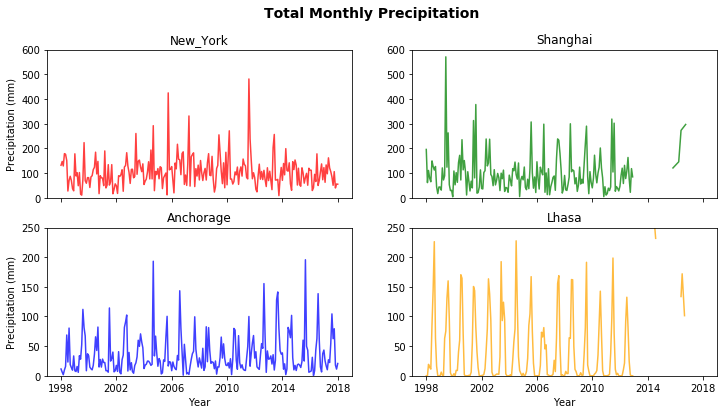

In [24]:
# Plot monthly total precipitation 

fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax: 
    xxx.plot(precip_data.get_group(city_names[count]).set_index("Date").Total_monthly_precip,
             color = colors[count], alpha = 0.75)
    xxx.set_title (city_names[count], fontsize = 12)
    
    # Set labels on the left and bottom axes of the entire graph only;
    # set optimal y limits for viewing the graph and for cross comparison
    
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Precipitation (mm)")
        
    if count > 1: 
        xxx.set_xlabel ("Year")
        xxx.set_ylim(0, 250)
    else:
        xxx.set_ylim(0, 600)
    
    count += 1

fig.suptitle("Total Monthly Precipitation", fontsize = 14, fontweight = "bold") 

A preliminary analysis by plotting the monthly total precipitation shows highly seasonal patterns. There's no intuitive way to calculate monthly volatility similar to Temp Difference, and calculating monthly rolling percent changes on total precipitation won't be meaningful due to the seasonal cyclicality; therefore I directly look at **annual trends**.

Text(0.5,0.98,'Total Annual Precipitation')

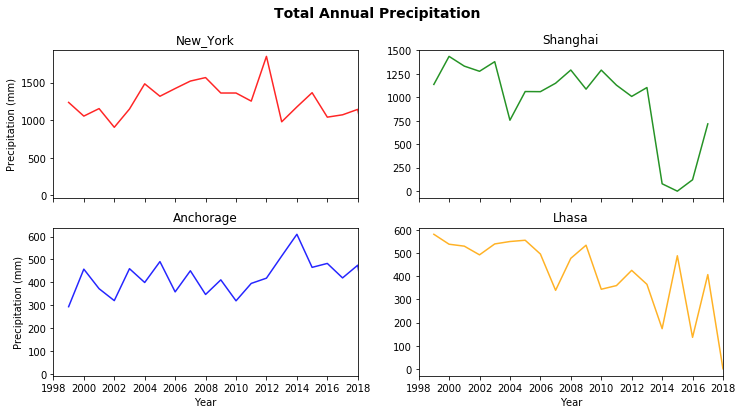

In [25]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = True, figsize = (12,6)) 
ax = ax.ravel()

city_names = ["New_York", "Shanghai", "Anchorage","Lhasa"]
colors = ["red", "green", "blue", "orange"]

count = 0 

for xxx in ax:
    
    # Group data by year, perform calculations on the aggregate, then plot the result
    
    test = precip_data.get_group(city_names[count]).groupby([pd.Grouper(key="Date", freq="Y")])
    diff = test.Total_monthly_precip.sum()
    xxx.plot(diff, color = colors[count], alpha = 0.85, linewidth = 1.5)
    
    xxx.set_title (city_names[count], fontsize = 12)
    xxx.set_xlim ("1998", "2018")
    
    # Set labels on the left and bottom axes of the entire graph only;
    if count == 0 or count == 2: 
        xxx.set_ylabel ("Precipitation (mm)")
        
    if count > 1: 
        xxx.set_xlabel ("Year")
    
    count += 1

fig.suptitle("Total Annual Precipitation", fontsize = 14, fontweight = "bold") 

This set of graphs of total annual precipitation for each city shows that there are overall time trends in precipitation, though the trend might differ by location. Anchorage has an increasing trend, New York has a neutral to increasing trend, and though the graphs for Shanghai and Lhasa are slightly problematic for the last five year of the series due to incomplete data, there's still a clear decreasing trend for the 15 years of valid observations. 

## Conclusion

The analysis above of weather trends in New York, Shanghai, Anchorage, and Lhasa show that while the weather pattern is predominantly driven by seasonal cyclicality and local climate characteristics, there are still disdinguishable changes in weather patterns over time. 

Daily temperature volatility, as measured by the difference between daily average max and min temperatures, are increasing over time for each location, both on a monthly rolling basis and a year-on-year basis. Monthly volatility as measured by the difference between monthly extreme max and min temperatures are much more variable, but interestingly hold the same over all trend as the daily average volatility values. This suggests that temperature patterns are evolving towards higher intra-day volatility overall, while volatility for each month hasn't increased in excess of this trend. On a larger timescale, annual temperature volatility as measured by the difference between max and min temperatures for each year shows a small increasing trend that varies in prominence across locations. 

Evidently, the analysis results on different timescales and different locations vary, but they all reach the general conclusion that temperature volatility is increasing. This preliminary conclusion indicates potential for further, more rigorous statistical analysis on the temperature trends. 

Available precipitation variables are more limited, but analyses of total precipitation on a monthly and annual scale show strong seasonal cyclicality and a general time trend that differ by location. The cause and impact of precipitation change can be much more nuanced -- increased temperature volatility may cause consistent increase/decrease or more volatility in precipitation -- but the general trends in total precipitation levels support the conclusion that weather patterns are evolving. 

Climate change impacts our planet in a wide variety of ways, often on a macro scale that doesn't seem to be tangible. As this project shows, our weather patterns are evolving and becoming more volatile, possibly due to climate change. These changes tangibly impact everyday life, and show that a changing climate and environment is not only an interesting discussion for the scientific community, but also a relevant issue for society to grapple with. 